### Machine Learning for Engineers: [SplitData](https://www.apmonitor.com/pds/index.php/Main/SplitData)
- [Split Data: Train, Validate, Test](https://www.apmonitor.com/pds/index.php/Main/SplitData)
 - Source Blocks: 5
 - Description: Splitting data ensures that there are independent sets for training, testing, and validation.
- [Course Overview](https://apmonitor.com/pds)
- [Course Schedule](https://apmonitor.com/pds/index.php/Main/CourseSchedule)

<img align=left width=500px src='https://apmonitor.com/pds/uploads/Main/split_data.png'>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('http://apmonitor.com/pds/uploads/Main/tclab_data6.txt')
data.set_index('Time',inplace=True)

# Split into train and test subsets (20% for test)
train, test = train_test_split(data, test_size=0.2, shuffle=False)

print('Train: ', len(train))
print(train.head())
print('Test: ', len(test))
print(test.head())

Train:  2880
       Q1   Q2     T1     T2
Time                        
0.0   0.0  0.0  16.06  16.00
1.0   0.0  0.0  16.06  15.97
2.0   0.0  0.0  16.06  16.03
3.0   0.0  0.0  16.03  16.00
4.0   0.0  0.0  16.03  15.94
Test:  721
         Q1   Q2     T1     T2
Time                          
2880.0  0.0  0.0  59.25  27.02
2881.0  0.0  0.0  59.22  27.02
2882.0  0.0  0.0  58.99  27.02
2883.0  0.0  0.0  58.93  27.02
2884.0  0.0  0.0  58.93  27.02


In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=20, n_informative=15)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)

print(len(X),len(X_train),len(X_test))

5000 4000 1000


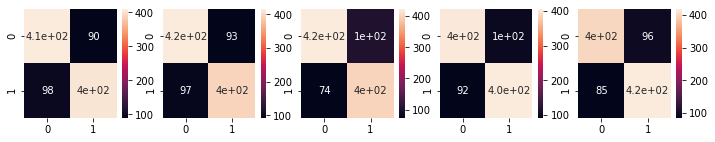

Accuracy: 81.44%


In [3]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define dataset
X, y = make_classification(n_samples=5000, n_features=20, n_informative=15)

# Set up K-fold cross validation
kf = KFold(n_splits=5,shuffle=True)

# Initialize model
dtc = DecisionTreeClassifier()

# Array to store accuracy scores
scores = np.zeros(5)

# Initialize plot
plt.figure(figsize=(12,2))

for i,(train_index, test_index) in enumerate(kf.split(X)):
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]

    dtc.fit(Xtrain,ytrain)
    yp = dtc.predict(Xtest)
    acc = accuracy_score(ytest,yp)
    scores[i] = acc

    plt.subplot(1,5,i+1)
    cm = confusion_matrix(yp,ytest)
    sns.heatmap(cm,annot=True)

plt.show()
print('Accuracy: %.2f%%' %(np.mean(scores*100)))